In [54]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Conduct experiment:
compare trajectory divergence for:
- Lorenz
- Logistic
- Holmes cubic
- 4D Hyperchaotic Lorenz
- Lorenz96
- Kuramoto Sivachinsky

### Define path here:

In [55]:
prepath = "C:/Users\Dennis\Documents\FILES&INFO\WISSEN\STUDIUM\Master LMU\Masterthesis\LyapunovExponentsSimulations"
exp_name_prefix = "all_sims_0602"

## Lorenz:

In [56]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    sys_flag = "lorenz"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point)
    return data_creation_function

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    seed = parameters["seed"]
    scale = parameters["scale"]
    randmode = parameters["randmode"]
    np.random.seed(seed)
    if randmode == "normal":
        starting_points = np.random.randn(Nens, 3)
    elif randmode == "uniform":
        starting_points = np.random.uniform(size=(Nens, 3)) - 0.5
    return starting_points*scale

create_sim_func_keys = []
create_sp_func_keys = ["seed", "scale", "randmode"]

In [57]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "sim": ["lorenz"],
    "seed": 31,
    "scale": [1 ],
    "randmode": ["uniform"],

    "dt": [0.05],
    "tau": 300,
    "T": 20,

    "eps": [1e-6]
}

# define Ndims and Nens
Ndims = 2
Nens = 200

# define saving:
save = True

div_name = "_lorenz2"
exp_name_div = exp_name_prefix + div_name

# other parameters:
get_info = True
random_directions = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info, random_directions=random_directions)

--------------------
create_sim_func_keys []
create_sp_func_keys ['seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
sim lorenz
seed 31
scale 1
randmode uniform
dt 0.05
tau 300
T 20
eps 1e-06
--------------------
STARTING CALCULATIONS (1): 
simulate the tau time steps ...
....
CALC: 1/1
{'seed': 31, 'scale': 1, 'randmode': 'uniform'}, dt: 0.05, tau: 300, T: 20, eps: 1e-06
N_ens: 1/200
timestep 400/400
N_ens: 2/200
timestep 400/400
N_ens: 3/200
timestep 400/400
N_ens: 4/200
timestep 400/400
N_ens: 5/200
timestep 400/400
N_ens: 6/200
timestep 400/400
N_ens: 7/200
timestep 400/400
N_ens: 8/200
timestep 400/400
N_ens: 9/200
timestep 400/400
N_ens: 10/200
timestep 400/400
N_ens: 11/200
timestep 400/400
N_ens: 12/200
timestep 400/400
N_ens: 13/200
timestep 400/400
N_ens: 14/200
timestep 400/400
N_ens: 15/200
timestep 400/400
N_ens: 16/200
timestep 400/400
N_ens: 17/200
timestep 400/400
N_ens: 18/200
timestep 400/400
N_ens: 19/200
timestep 400/400
N_ens: 20/20

lines: 1, cols: 1, rows: 1


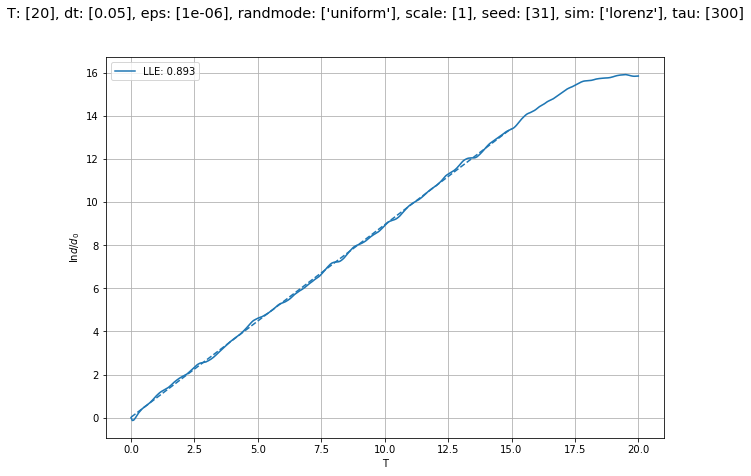

In [58]:
plot_func = simt.plot_div_file

zs = []
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 0
t_max = 15

include_fit_qr = 0
t_min_qr = 0
t_max_qr = 7.5

subfigsize = (10, 7)
xlims = None #(0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index,
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

## Logistic Map:

In [59]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    r = parameters["r"]
    sys_flag = "logistic"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point, r=r)
    return data_creation_function

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    seed = parameters["seed"]
    np.random.seed(seed)
    starting_points = np.random.uniform(size=(Nens, 1))*0.2
    return starting_points

create_sim_func_keys = ["r"]
create_sp_func_keys = ["seed", "scale", "randmode"]

In [60]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "r": 4,
    "seed": 31,

    "dt": [1],
    "tau": 50,
    "T": 50,

    "eps": [1e-6]
}

# define Ndims and Nens
Ndims = 2
Nens = 100

# define saving:
save = True

div_name = "_logistic2"
exp_name_div = exp_name_prefix + div_name

# other parameters:
get_info = True
random_directions = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info, random_directions=random_directions)

--------------------
create_sim_func_keys ['r']
create_sp_func_keys ['seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
r 4
seed 31
dt 1
tau 50
T 50
eps 1e-06
--------------------
STARTING CALCULATIONS (1): 
simulate the tau time steps ...
....
CALC: 1/1
{'r': 4, 'seed': 31}, dt: 1, tau: 50, T: 50, eps: 1e-06
N_ens: 1/100
timestep 50/50
N_ens: 2/100
timestep 50/50
N_ens: 3/100
timestep 50/50
N_ens: 4/100
timestep 50/50
N_ens: 5/100
timestep 50/50
N_ens: 6/100
timestep 50/50
N_ens: 7/100
timestep 50/50
N_ens: 8/100
timestep 50/50
N_ens: 9/100
timestep 50/50
N_ens: 10/100
timestep 50/50
N_ens: 11/100
timestep 50/50
N_ens: 12/100
timestep 50/50
N_ens: 13/100
timestep 50/50
N_ens: 14/100
timestep 50/50
N_ens: 15/100
timestep 50/50
N_ens: 16/100
timestep 50/50
N_ens: 17/100
timestep 50/50
N_ens: 18/100
timestep 50/50
N_ens: 19/100
timestep 50/50
N_ens: 20/100
timestep 50/50
N_ens: 21/100
timestep 50/50
N_ens: 22/100
timestep 50/50
N_ens: 23/100
timestep 50/5

lines: 1, cols: 1, rows: 1


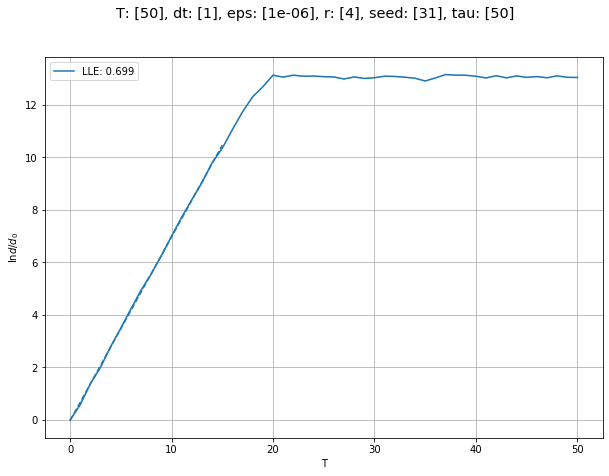

In [68]:
plot_func = simt.plot_div_file

zs = []
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 0
t_max = 15

include_fit_qr = 0
t_min_qr = 0
t_max_qr = 7.5

subfigsize = (10, 7)
xlims = None #(0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index,
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

## Kuramoto Sivachinsky:


In [62]:
# define all the simulations we want to test:

def create_ks_sim_func(mode, dimensions, system_size, *args):
    if mode == "precision":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps,
                                                                    starting_point,
                                     precision=args[1], fft_type=args[0])
    elif mode == "Bhatt":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions, system_size, dt, time_steps,
                                                                   starting_point)
    elif mode == "normal":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point)
    elif mode == "normal_M":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point,
                                                             M=args[0])
    elif mode == "Pathak":
        from rescomp.alternative_sims.pvlachas.Utils import KS
        def data_creation_function(time_steps, dt, starting_point=None):
            L = system_size / (2 * np.pi)
            dns = KS.KS(L=L, N=dimensions, dt=dt, nsteps=time_steps)
            dns.IC(u0=starting_point)
            # simulate initial transient
            dns.simulate()
            # convert to physical space
            dns.fou2real()
            return dns.return_sim_data()
    elif mode == "rkstiff":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_rkstiff(dimensions, system_size, dt, time_steps,
                                                                   starting_point, IF_eps=args[0])
    return data_creation_function

# Create different KS Sim functions:
def create_ks_sim_dict(dimensions, system_size):
    ks_sim_dict = {
                   "scipy32": create_ks_sim_func("precision", dimensions, system_size, "scipy", 32),
                   "scipy64": create_ks_sim_func("precision", dimensions, system_size, "scipy", 64),
                   "scipy": create_ks_sim_func("precision", dimensions, system_size, "scipy", None),
                   "numpy32": create_ks_sim_func("precision", dimensions, system_size, "numpy", 32),
                   "numpy64": create_ks_sim_func("precision", dimensions, system_size, "numpy", 64),
                   "numpy": create_ks_sim_func("precision", dimensions, system_size, "numpy", None),
                   "Bhatt": create_ks_sim_func("Bhatt", dimensions, system_size),
                   "normal": create_ks_sim_func("normal", dimensions, system_size),
                   "normalM1": create_ks_sim_func("normal", dimensions, system_size, 16),
                   "normalM2": create_ks_sim_func("normal", dimensions, system_size, 200),
                   "Pathak": create_ks_sim_func("Pathak", dimensions, system_size),
                   "rkstiff": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-4),
                   "rkstiffE1": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-1),
                   "rkstiffE2": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-2),
                   "rkstiffE3": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-7),
    }
    return ks_sim_dict

In [63]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    dims = parameters["dims"]
    L = parameters["L"]
    sim = parameters["sim"]
    return create_ks_sim_dict(dimensions=dims, system_size=L)[sim]

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    mode = parameters["mode"]
    dims = parameters["dims"]
    seed = parameters["seed"]
    L = parameters["L"]
    np.random.seed(seed)
    if mode == "default":
        x = L * np.transpose(np.conj(np.arange(1, dims + 1))) / dims
        base = np.cos(2 * np.pi * x / L) * (1 + np.sin(2 * np.pi * x / L))
        starting_points = np.repeat(base[np.newaxis, :], Nens, axis=0)
        starting_points += np.random.randn(Nens, dims)*0.1
    elif mode == "random":
        starting_points = np.random.randn(Nens, dims)
    return starting_points

create_sp_func_keys = ["dims", "seed", "L", "mode"]
create_sim_func_keys = ["dims", "L", "sim"]

In [64]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "L": 36,
    "dims": [54],
    "sim": ["scipy32", ], # , "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64",
    "seed": 100,
    "mode": ["default", "random"],
    # "scale": [2],

    "dt": [0.5],
    "tau": [1000],
    "T": 30,

    "eps":  [1e-6]
}
# define Ndims and Nens
Ndims = 2
Nens = 200

# define saving:
save = True

div_name = "_KS7"
exp_name_div = exp_name_prefix + div_name

# other parameters:
get_info = True
random_directions = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info, random_directions=random_directions)

--------------------
create_sim_func_keys ['dims', 'L', 'sim']
create_sp_func_keys ['dims', 'seed', 'L', 'mode']
--------------------
--------------------
PARAMETERS: 
L 36
dims 54
sim scipy32
seed 100
mode ['default', 'random']
dt 0.5
tau 1000
T 30
eps 1e-06
--------------------
STARTING CALCULATIONS (2): 
simulate the tau time steps ...
....
CALC: 1/2
{'L': 36, 'dims': 54, 'sim': 'scipy32', 'seed': 100, 'mode': 'default'}, dt: 0.5, tau: 1000, T: 30, eps: 1e-06
N_ens: 1/200
timestep 60/60
N_ens: 2/200
timestep 60/60
N_ens: 3/200
timestep 60/60
N_ens: 4/200
timestep 60/60
N_ens: 5/200
timestep 60/60
N_ens: 6/200
timestep 60/60
N_ens: 7/200
timestep 60/60
N_ens: 8/200
timestep 60/60
N_ens: 9/200
timestep 60/60
N_ens: 10/200
timestep 60/60
N_ens: 11/200
timestep 60/60
N_ens: 12/200
timestep 60/60
N_ens: 13/200
timestep 60/60
N_ens: 14/200
timestep 60/60
N_ens: 15/200
timestep 60/60
N_ens: 16/200
timestep 60/60
N_ens: 17/200
timestep 60/60
N_ens: 18/200
timestep 60/60
N_ens: 19/200
timest

lines: 2, cols: 1, rows: 1


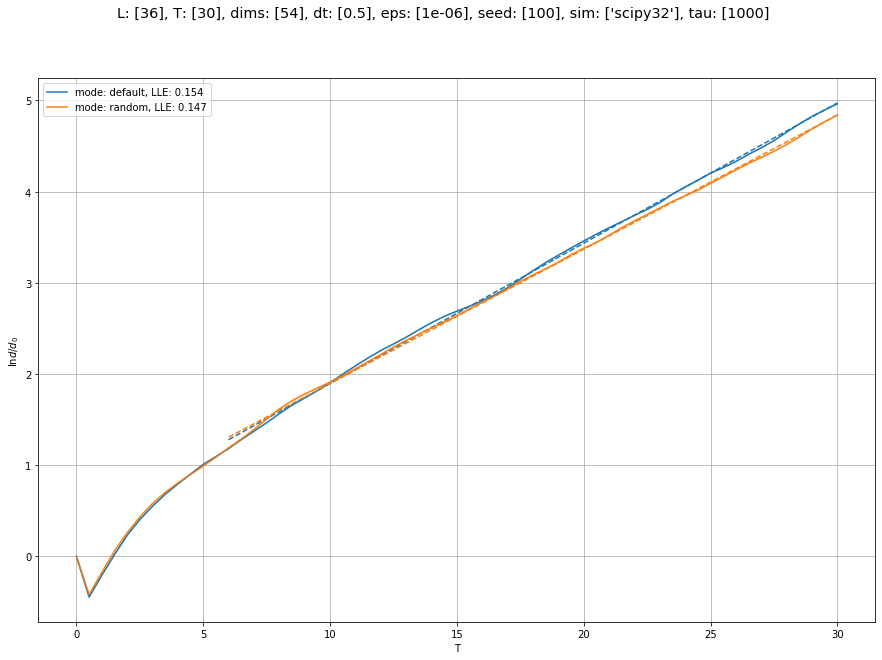

In [65]:
plot_func = simt.plot_div_file

zs = ["mode"]
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 6
t_max = 30

include_fit_qr = 0
t_min_qr = 5
t_max_qr = 30

subfigsize = (15, 10)
xlims = None # (0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index,
            t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)
